In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statistics import mean

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi


%matplotlib inline
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid", {"axes.facecolor": ".93"})

palette = [ '#00BFC4' ,'#F8766D', '#0085C7', '#000000', "#FFCE54", '#A1469E']
sns.set_palette(palette)

In [2]:
from googleapiclient.discovery import build
from google.oauth2 import service_account

SERVICE_ACCOUNT_FILE = 'keys.json'
SCOPES = ['https://www.googleapis.com/auth/spreadsheets']

creds = None

creds = service_account.Credentials.from_service_account_file(
        SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# The spreadsheet ID.
SAMPLE_SPREADSHEET_ID = '168QXouhmWE53gWDexgZ9DMLn3JuMKr-xgG6IiUdGIP8'

service = build('sheets', 'v4', credentials=creds)

# Call the Sheets API
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SAMPLE_SPREADSHEET_ID,
                            range='Data!a1:r116').execute()
values = result.get('values', [])

In [3]:
data = pd.DataFrame(values)
print(data)

                     0                                  1   \
0             Timestamp  1. Kindly provide your full name.   
1    9/30/2021 22:27:54                       Sibbir Riyan   
2    10/1/2021 16:48:46              Baha Uddin Khan Sayem   
3    10/1/2021 17:35:35                       Sadman Sakib   
4    10/1/2021 17:37:25                    Arman Bin Islam   
..                  ...                                ...   
111  10/2/2021 19:18:50            Camellia Cathrina Cruze   
112  10/2/2021 19:19:50                     Arefin Rahman    
113  10/2/2021 22:57:08             Syeda Fairooze Hossain   
114  10/2/2021 23:15:30                   Shafika Ferdous    
115  10/2/2021 23:20:56                       Shafkat Amin   

                                                 2   \
0    2. Kindly provide the name of your University.   
1                          IBA, University of Dhaka   
2                          IBA, University of Dhaka   
3                               Uni

In [4]:
data = pd.read_excel('Data_2.xlsx')

In [5]:
data

,Sl,Attitude,EL1,EL2,EL3,JT1,JT2,JT3,CKS1,CKS2,...,HC2,HC3,Offline_avg_GPA,Online_avg_GPA,On-Off,EL_Mean,JT_Mean,CKS_Mean,HC_Mean,Unnamed: 20
0,1,Negative,1,1,1,5,5,5,5,5,...,4,2,3.42,3.67,0.25,1.000000,5.000000,5.0,3.333333,2.914286
1,2,Positive,3,1,2,4,4,4,5,4,...,4,3,3.90,3.80,-0.10,2.000000,4.000000,4.5,3.666667,NaN
2,3,Neutral,1,1,3,5,4,4,5,4,...,3,1,3.30,3.50,0.20,1.666667,4.333333,4.5,2.000000,NaN
3,4,Neutral,1,2,2,5,4,4,4,5,...,4,2,3.30,3.60,0.30,1.666667,4.333333,4.5,3.000000,NaN
4,5,Positive,2,1,2,4,5,4,4,4,...,1,2,3.50,3.20,-0.30,1.666667,4.333333,4.0,1.666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,136,Neutral,3,3,1,3,5,5,3,5,...,3,1,3.70,3.60,-0.10,2.333333,4.333333,4.0,3.000000,NaN
136,137,Neutral,3,2,3,1,1,3,4,4,...,3,3,3.55,3.75,0.20,2.666667,1.666667,4.0,2.666667,NaN
137,138,Positive,4,4,4,4,4,4,4,4,...,5,4,2.66,3.14,0.48,4.000000,4.000000,4.0,4.666667,NaN
138,139,Neutral,2,1,1,5,4,4,4,3,...,2,1,3.80,3.95,0.15,1.333333,4.333333,3.5,2.333333,NaN


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


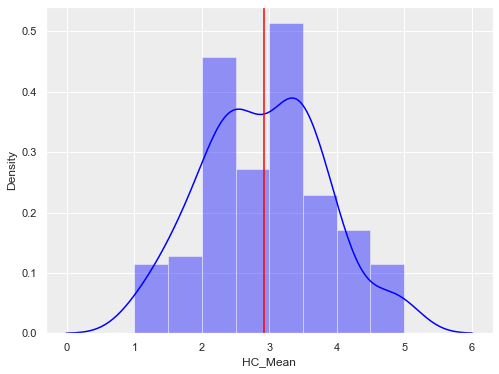

In [6]:
sns.distplot(data.HC_Mean, color = "blue")
mean = data['HC_Mean'].mean()

plt.axvline(mean, 0,1, color = 'red')

plt.savefig('HC_Mean', dpi = 500)

In [7]:
scipy.stats.f.ppf(0.95, 2, 137 )

3.0622044032400395

In [8]:
data_2 = data[['Attitude', 'Online_avg_GPA']]

model = smf.ols('Online_avg_GPA ~ C(Attitude)' , data = data_2).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                sum_sq     df         F    PR(>F)
C(Attitude)   0.155957    2.0  1.063924  0.347933
Residual     10.041174  137.0       NaN       NaN


In [9]:
data_EL = data[['Attitude', 'EL_Mean']]

model = smf.ols('EL_Mean ~ C(Attitude)' , data = data_EL).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                sum_sq     df          F        PR(>F)
C(Attitude)  25.437143    2.0  21.728775  6.363080e-09
Residual     80.190635  137.0        NaN           NaN


In [10]:
data_JT = data[['Attitude', 'JT_Mean']]

model = smf.ols('JT_Mean ~ C(Attitude)' , data = data_JT).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                sum_sq     df         F    PR(>F)
C(Attitude)   8.666825    2.0  7.670897  0.000695
Residual     77.393492  137.0       NaN       NaN


In [11]:
data_CKS = data[['Attitude', 'CKS_Mean']]

model = smf.ols('CKS_Mean ~ C(Attitude)' , data = data_CKS).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                sum_sq     df         F    PR(>F)
C(Attitude)   3.931637    2.0  3.306078  0.039606
Residual     81.461220  137.0       NaN       NaN


In [12]:
data_HC = data[['Attitude', 'HC_Mean']]

model = smf.ols('HC_Mean ~ C(Attitude)' , data = data_HC).fit()
aov_table = anova_lm(model, typ = 2)

print(aov_table)

                sum_sq     df          F    PR(>F)
C(Attitude)  20.526548    2.0  15.100904  0.000001
Residual     93.111548  137.0        NaN       NaN


<AxesSubplot:xlabel='Attitude', ylabel='HC_Mean'>

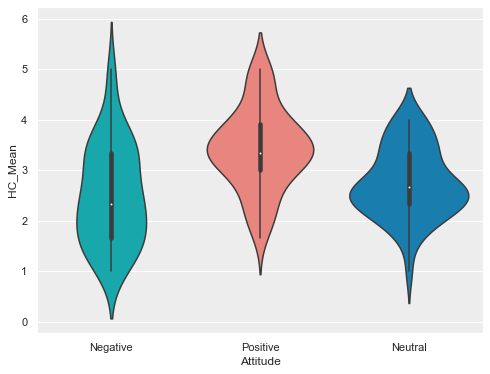

In [18]:
#VIOLIN PLOTS
sns.violinplot(x="Attitude", y="HC_Mean", data=data)



In [14]:
setosa_df = flowers_df[flowers_df.species == 'setosa']
versicolor_df = flowers_df[flowers_df.species == 'versicolor']
virginica_df = flowers_df[flowers_df.species == 'virginica']

plt.hist(setosa_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));
plt.hist(versicolor_df.sepal_width, alpha=0.4, bins=np.arange(2, 5, 0.25));

NameError: name 'flowers_df' is not defined